In [9]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import dataset

path = r'Data\data.csv'
dataset = pd.read_csv(path)
df = dataset.copy()

In [4]:
df = df.drop('id', axis=1)
X = df.drop('state', axis=1)
Y = pd.get_dummies(df['state'], prefix='state', drop_first=True)
Y = Y.rename(columns={'state_retired' : 'state'})

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [6]:
# Cargar el modelo guardado

with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [7]:
y_pred = model.predict(X_test)

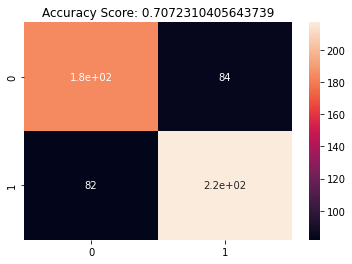

In [10]:
cm_best_model = confusion_matrix(Y_test, y_pred)
acc_best_model = accuracy_score(Y_test, y_pred)
sns.heatmap(cm_best_model, annot = True)
plt.title('Accuracy Score: {0}'.format(acc_best_model))
plt.show()

In [11]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       268
           1       0.72      0.73      0.72       299

    accuracy                           0.71       567
   macro avg       0.71      0.71      0.71       567
weighted avg       0.71      0.71      0.71       567

